<center><font size = "10"> Week 5 - Single Cell Electrophysiology <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 5
<br>Group member1: Camil Hamdane
<br>Group member2: Martim Simões
<br>Group member3: Nathan Girard
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

# Optional. Stimulation protocols to study various cell properties

<font size='3'>
Your task is to design and perform two different stimulation protocols that could be used to study the AP properties (e.g. amplitude, shape, rise-time, fall-time) and passive properties (e.g. input resistance and voltage base) of the cells you have in your group folder (.asc files). When defining the cells, for the passive properties use the parameters from tutorial 01 and for the active parameters use the MOD files used in tutorial 01. Don't include any biophysics on the cell axon.

<font size='3'>Run the protocols (saving the results to a csv file - you will need those for question 3), and plot soma voltages and the current applied. Explain the motivation behind your choice of protocols - why do you think these types of protocols are usefull when studying cell behavior?
    

In [1]:
# This will compile the mechanisms inside the MOD files (and create a new folder x86_64/special).
! nrnivmodl

/usr/bin/xcrun
/Users/nathangirard/Desktop/In Silico Neuroscience/tutorials/Week05_Code
-n Mod files:
-n  "./NaTs2_t.mod"
-n  "./SK_E2.mod"
-n  "./SKv3_1.mod"


Creating x86_64 directory for .o files.

COBJS=''
 -> Compiling mod_func.c
/Users/runner/miniforge3/conda-bld/neuron_1621594989016/_build_env/bin/clang -g  -O2 -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -isystem /opt/anaconda3/envs/ada/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/neuron_1621594989016/work=/usr/local/src/conda/neuron-8.0.0 -fdebug-prefix-map=/opt/anaconda3/envs/ada=/usr/local/src/conda-prefix  -I.   -I/opt/anaconda3/envs/ada/include  -fPIC -c mod_func.c -o mod_func.o
 -> NMODL ../NaTs2_t.mod
make: /Users/runner/miniforge3/conda-bld/neuron_1621594989016/_build_env/bin/clang: No such file or directory
 -> NMODL ../SK_E2.mod
 -> NMODL ../SKv3_1.mod
(cd ".."; MODLUNIT=/opt/anaconda3/envs/ada/share/nrn/lib/nrnunits.lib /opt/anaconda3/envs/ada/b

In [2]:
from neuron import h
import hoc
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm

--No graphics will be displayed.


In [6]:
# Define NEURON class with specific morphology and channel behavior

class NEURON:
    def __init__(self, file_path):
        self.build_morphology(file_path)
        self.define_biophysics()
        
    def build_morphology(self, file_path):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file('stdlib.hoc')
        h.load_file("import3d.hoc")
        #cell = h.Import3d_SWC_read() # We have a .swc morphology file
        cell = h.Import3d_Neurolucida3()

        # Read the file and creates automatically section.connect(parent) statements
        cell.input(file_path)

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell,0)
        self.importedcell.instantiate(None) 

        # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.basal = []
        self.apical = []
        #self.axonal = [] # for the moment we will forget about the axon
        self.all = []
        for sec in h.allsec():
            #print (sec)
            if 'soma' in sec.name():
                self.somatic.append(sec)
            if 'dend' in sec.name():
                self.basal.append(sec)
            if 'apic' in sec.name():
                self.apical.append(sec)
            #if 'axon' in sec.name():
            #    self.axonal.append(sec)
    
    def define_biophysics(self):
        """
        Distributes passive mechanisms and the different types
        of ion channels on the soma and dendrites
        """
        # Define passive properties
        # You can try to change the passice properties and see what happens
        for sec in h.allsec():
            sec.Ra = 100
            sec.cm = 1
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75
                
        # Define active properties for soma and dendrites (basal and apical)
        for sec in self.somatic:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
          
        for sec in self.apical:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
        
        for sec in self.basal:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1

In [7]:
Cell01 = NEURON(file_path = "Homework_week5/group5/cell1_g5.asc")


5771 lines read

Homework_week5/group5/cell1_g5.asc problems


Main branch starting at line 31 is outside the soma bounding boxes
  Making a logical connection to center of nearest soma


ValueError: argument not a density mechanism name.

In [ ]:
Cell01.somatic[0].psection()

#### Subthreshold activity

In [ ]:
def stimulation(cell, stim_ampl)
    # Define plots
    fig1, ax1 = plt.subplots(figsize=(15,3))
    ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

    fig2, ax2 = plt.subplots(figsize=(15,3))
    ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

    # Stimulation
    for sa in stim_ampl:  
        # Place a stimulation electrode in the middle of the soma
        stim = h.IClamp(cell.somatic[0](0.5))         
        stim.delay = 100   # stim delay (ms)
        stim.dur = 300     # stim duration (ms)
        stim.amp = sa    # stim amplitude (nA)    
        # Initialize NEURON vectors to record time, voltage and current
        # time vector
        rec_t = h.Vector()
        rec_t.record(h._ref_t)
        # membrame potential vector
        rec_v_soma = h.Vector()
        rec_v_soma.record(cell.somatic[0](0.5)._ref_v)
        # current
        rec_i = h.Vector()
        rec_i.record(stim._ref_i)

        # Initialize and run a simulation
        h.load_file('stdrun.hoc')
        h.finitialize(-65)
        h.continuerun(500)

        ax1.plot(rec_t, rec_v_soma)
        ax2.plot(rec_t, rec_i)

In [ ]:
# Inject current steps into the soma
stim_sub = [- 0.05, - 0.01, 0.1]
stimulation(Cell01, stim_sub)

#### Suprathreshold activity

In [ ]:
# Inject current steps into the soma
stim_sup = [0.01, 0.5, 1.0]
stimulation(Cell01, stim_sup)

# <font color= 'red'>Ex1:</font>. Analysing real single cell voltage traces from patch-clamp experiments

<font size='3'>Find the voltage base, firing frequency, spike count and after-hyperpolarization depth (AHP-depth) from the recordings that you can find in your folder group (.dat files). Extract the asked features from the one or several stimulation protocols that you think you can extract the features from.

<font size='3'>You can compute it as you wish, using eFEL, scipy.signal  or creating your own functions. <font color= 'red'>[1.5 pts]

#### Traces description

* The files are named with: stimuli type (e.g. "APWaveform", "FirePattern", "IV"). 
* Sweep (repetition) number: (e.g. "APWaveform_46-51"), of increasing/decreasing amplitudes.
* Note that we have pairs of recordings with the same trace number (e.g. "exp_APWaveform_ch7_51.dat" and "exp_APWaveform_ch6_51.dat"). One of them contains the current stimulus (in this case "*ch7*") and the other the voltage response (in this case "*ch6*").
    


In [154]:
# Load usefull packages
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from scipy.signal import find_peaks, peak_prominences, argrelmin

In [155]:
def get_data(fn):
    """Read  data file and format for plotting"""
    d = np.fromfile(fn)    
    return d[::2], d[1::2]

Text(0.08, 0.5, 'Current intensity [mA]')

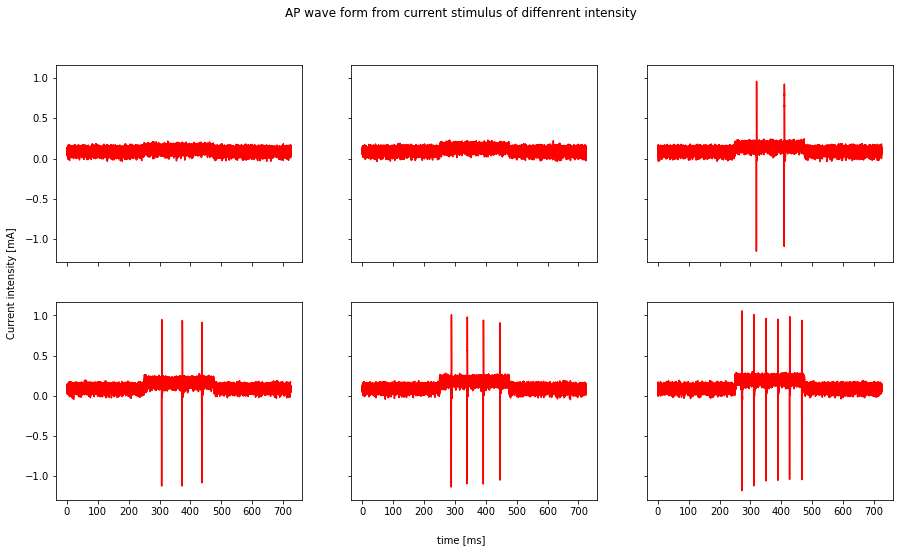

In [156]:
FILE_PATH_EX01 = "Homework_week5/group5/exp_APWaveform_ch"
extension = ".dat"

FILES = []
files_v7 = [FILE_PATH_EX01 + "7_" + str(i) + extension for i in np.arange(46,52)]
files_v6 = [FILE_PATH_EX01 + "6_" + str(i) + extension for i in np.arange(46,52)]
FILES.append(files_v6)

fig, ax = plt.subplots(nrows=len(files_v7)//2 -1, ncols=len(files_v7)//2, 
                       sharex = True, sharey = True, figsize=(15,8))
ax = ax.ravel()

for index, data in enumerate(files_v7):
    t, v = get_data(data)
    ax[index].plot(t, v, '-r')

plt.suptitle("AP wave form from current stimulus of diffenrent intensity")
fig.text(0.5, 0.05, 'time [ms]', ha='center')
fig.text(0.08, 0.5, 'Current intensity [mA]', va='center', rotation='vertical')

Text(0.08, 0.5, 'Voltage response [mV]')

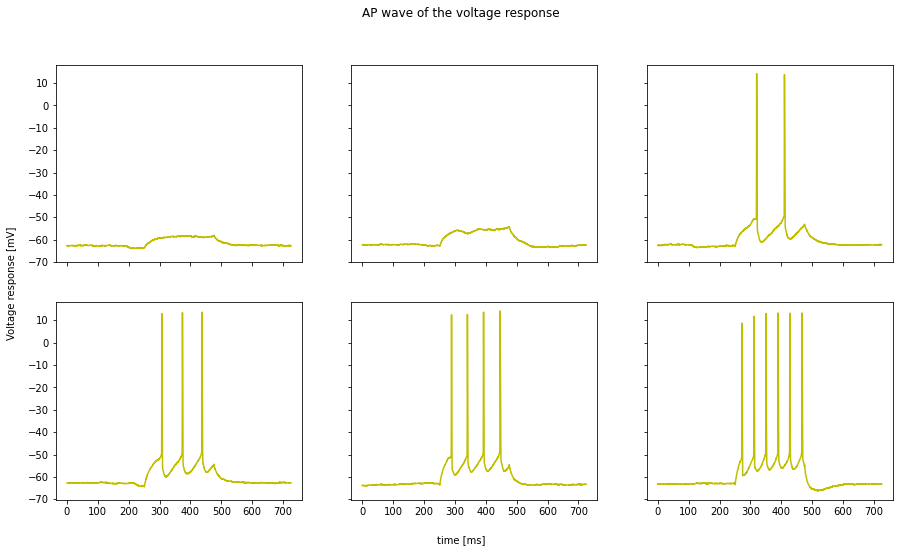

In [157]:
fig, ax = plt.subplots(nrows=len(files_v7)//2 -1, ncols=len(files_v7)//2, 
                       sharex = True, sharey = True, figsize=(15,8))
ax = ax.ravel()

for index, data in enumerate(files_v6):
    t, v = get_data(data)
    ax[index].plot(t, v, '-y')

plt.suptitle("AP wave of the voltage response")
fig.text(0.5, 0.05, 'time [ms]', ha='center')
fig.text(0.08, 0.5, 'Voltage response [mV]', va='center', rotation='vertical')

 #### Patch-clamp experiments
 

Text(0.08, 0.5, 'Current intensity [mA]')

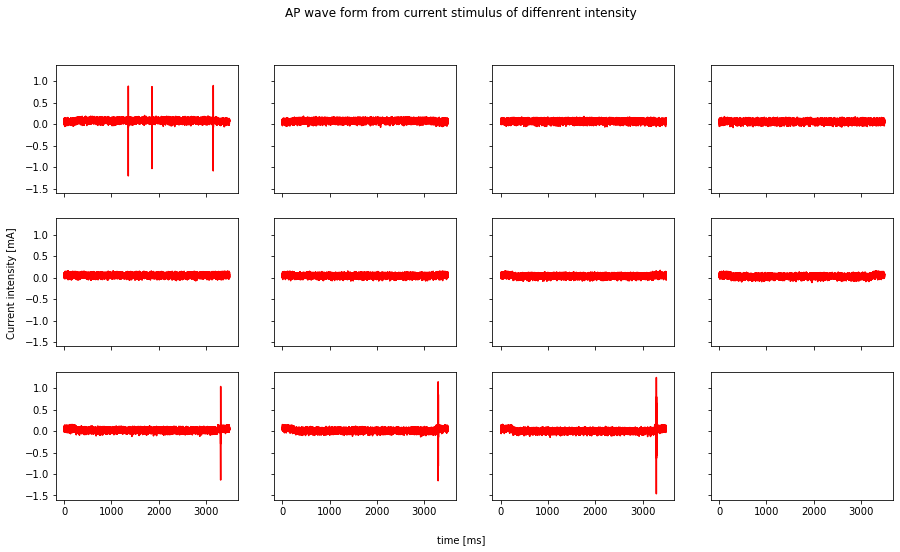

In [158]:
# Open and plot files
FILE_PATH_EX01 = "Homework_week5/group5/exp_IV_ch"
extension = ".dat"

files_v7 = [FILE_PATH_EX01 + "7_20" + str(i) + extension for i in np.arange(31,42)]
files_v6 = [FILE_PATH_EX01 + "6_20" + str(i) + extension for i in np.arange(31,42)]
FILES.append(files_v6)

fig, ax = plt.subplots(nrows=len(files_v7)//2 - 2, ncols=len(files_v7)//2 -1 , 
                       sharex = True, sharey = True, figsize=(15,8))
ax = ax.ravel()

for index, data in enumerate(files_v7):
    t, v = get_data(data)
    ax[index].plot(t, v, '-r')

plt.suptitle("AP wave form from current stimulus of diffenrent intensity")
fig.text(0.5, 0.05, 'time [ms]', ha='center')
fig.text(0.08, 0.5, 'Current intensity [mA]', va='center', rotation='vertical')

Text(0.08, 0.5, 'Voltage amplitude [mV]')

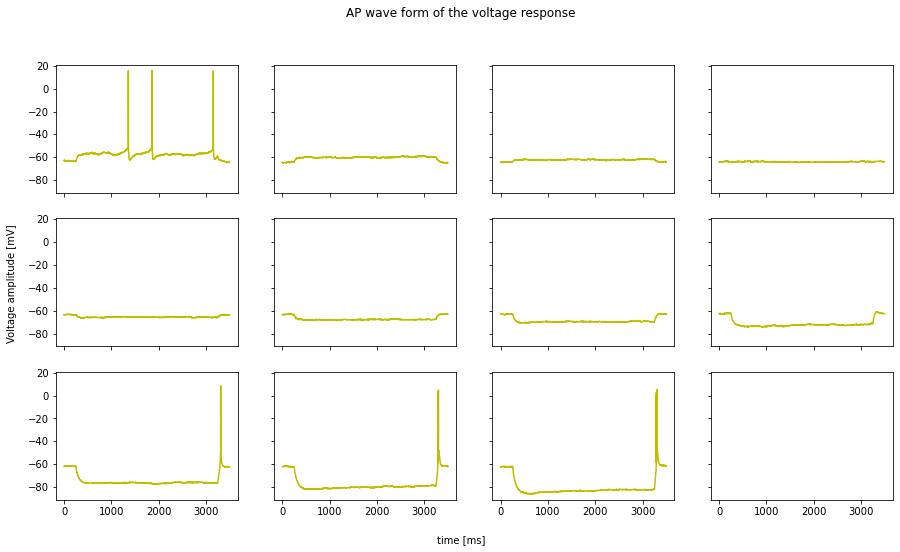

In [159]:
fig, ax = plt.subplots(nrows=len(files_v7)//2 - 2, ncols=len(files_v7)//2 -1 , 
                       sharex = True, sharey = True, figsize=(15,8))
ax = ax.ravel()

for index, data in enumerate(files_v6):
    t, v = get_data(data)
    ax[index].plot(t, v, '-y')

plt.suptitle("AP wave form of the voltage response")
fig.text(0.5, 0.05, 'time [ms]', ha='center')
fig.text(0.08, 0.5, 'Voltage amplitude [mV]', va='center', rotation='vertical')

Text(0.08, 0.5, 'Current intensity [mA]')

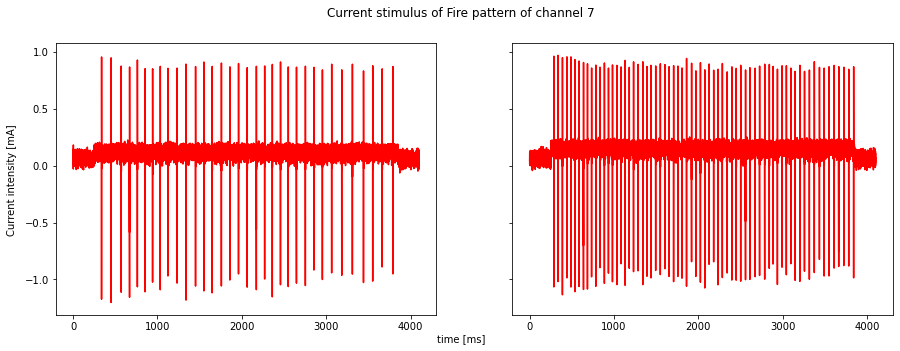

In [160]:
FILE_PATH_EX01 = "Homework_week5/group5/exp_FirePattern_ch"
extension = ".dat"

files_v7 = [FILE_PATH_EX01 + "7_10" + str(i) + extension for i in np.arange(48,50)]
files_v6 = [FILE_PATH_EX01 + "6_10" + str(i) + extension for i in np.arange(48,50)]
FILES.append(files_v6)

fig, ax = plt.subplots(nrows=len(files_v7)//2, ncols=len(files_v7)//2 + 1, 
                       sharex = True, sharey = True, figsize=(15,5))
ax = ax.ravel()

for index, data in enumerate(files_v7):
    t, v = get_data(data)
    ax[index].plot(t, v, '-r')

plt.suptitle("Current stimulus of Fire pattern of channel 7")
fig.text(0.5, 0.05, 'time [ms]', ha='center')
fig.text(0.08, 0.5, 'Current intensity [mA]', va='center', rotation='vertical')

Text(0.08, 0.5, 'Voltage response [mV]')

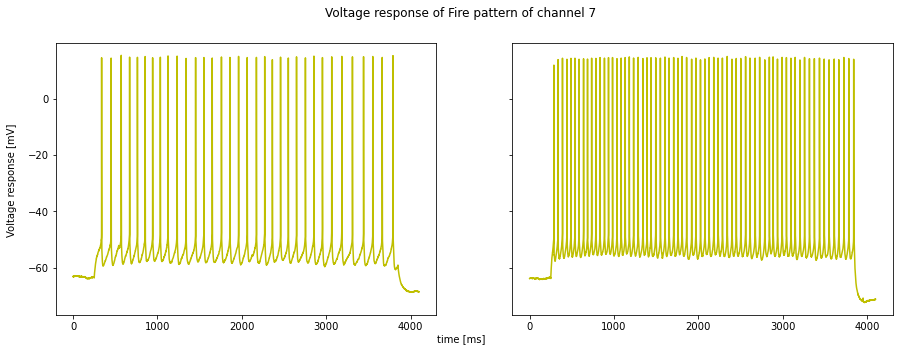

In [161]:
fig, ax = plt.subplots(nrows=len(files_v7)//2, ncols=len(files_v7)//2 + 1, 
                       sharex = True, sharey = True, figsize=(15,5))
ax = ax.ravel()

for index, data in enumerate(files_v6):
    t, v = get_data(data)
    ax[index].plot(t, v, '-y')

plt.suptitle("Voltage response of Fire pattern of channel 7")
fig.text(0.5, 0.05, 'time [ms]', ha='center')
fig.text(0.08, 0.5, 'Voltage response [mV]', va='center', rotation='vertical')

In [174]:
def analyze_experiments(filenames, verbose = True, plot = False):
    """ This method determine the voltage base, firing frequency, spike count 
        and after-hiperpolarization depth (AHP-depth) from the files, of name filename.
        
        :param filename: array of the names of files to analyze.
        :param verbose: display the informations for each file if True, else not.
        :param plot: plot the peaks found and and voltage_base for each file if True, else not.
        
        :return volatge_base: array of the values of voltage base.
        :return spike_count: array of the values of spike count.
        :return firing_frequency: array of the values of firing frequency.
        :return AHP_depth: array of the values of after-hyperpolarization depth.
    """
    voltage_base, spike_count, firing_frequency = [], [], []
    AHP_depth = []
    
    for name in filenames:
        print("\nAnalyzing file {}\n".format(name))
        t,v = get_data(name)
        
        peaks_time, _ = find_peaks(v, prominence = 1, height = -40)
        amplitudes = peak_prominences(v, peaks_time, wlen=40)[0]
        
        if len(peaks_time) == 0:
            vb = np.mean(v[1000]) 
            ad = vb
        else:
            idx_vb = peaks_time[0]
            vb = np.mean(v[:idx_vb]) # voltage before first AP triggered
            
            idx_ad = argrelmin(v)
            ad = np.mean(v[idx_ad])
            
            if vb < np.mean(v[500]): # account for inhibitory neuron
                vb = np.mean(v[500]) 
            
        sc = len(peaks_time)
        ff = sc / t[-1] * 1e3 # conversion of ms into s (frequency in Hz)
        
        voltage_base.append(vb)
        spike_count.append(sc)
        firing_frequency.append(ff)
        AHP_depth.append(ad)
        
        if verbose:
            if sc == 0:
                print("- No AP triggered")
                print("- Voltage base = AHP depth = {} mV".format(vb))
            else:
                print("- Voltage base = {} mV, spike count = {}".format(vb, sc))
                print("- firing frequency = {} Hz, AHP depth = {} mV".format(ff, ad))
                
        if plot:
            plt.figure(figsize=(15,3))
            plt.plot(v,'k--')
            plt.plot(peaks_time, v[peaks_time], 'rx')
            plt.hlines(vb, 0, len(v), 'g', label = "Voltage base")
            plt.hlines(ad, 0, len(v), 'b', label = "AHP-depth")
            plt.ylabel('voltage [mV]')
            plt.xlabel('time [ms]')
            plt.legend()
            plt.show()
            
    return voltage_base, spike_count, firing_frequency, AHP_depth


Analyzing file Homework_week5/group5/exp_APWaveform_ch6_46.dat

- No AP triggered
- Voltage base = AHP depth = -62.59375 mV


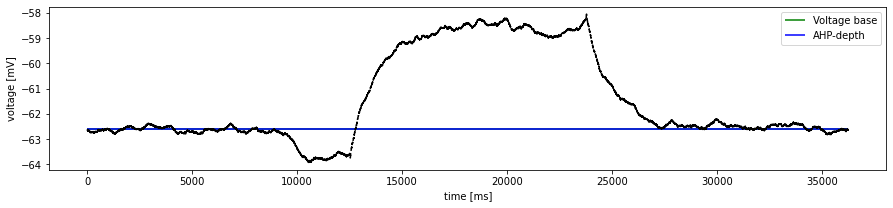


Analyzing file Homework_week5/group5/exp_APWaveform_ch6_47.dat

- No AP triggered
- Voltage base = AHP depth = -62.30000305175781 mV


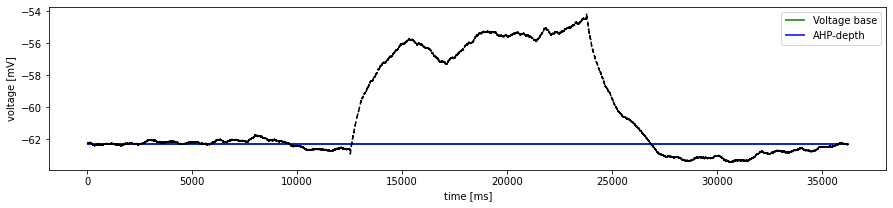


Analyzing file Homework_week5/group5/exp_APWaveform_ch6_48.dat

- Voltage base = -60.92543167779346 mV, spike count = 2
- firing frequency = 2.7587728978150516 Hz, AHP depth = -60.52137785432384 mV


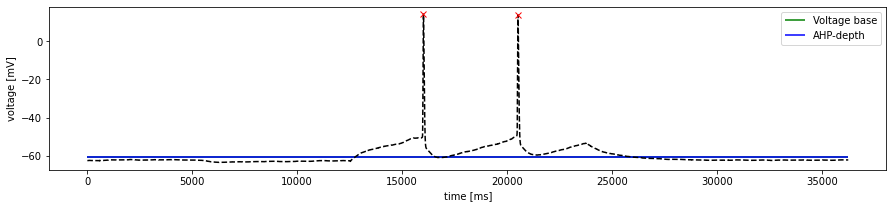


Analyzing file Homework_week5/group5/exp_APWaveform_ch6_49.dat

- Voltage base = -61.36546499904562 mV, spike count = 3
- firing frequency = 4.138159346722578 Hz, AHP depth = -60.77626864459064 mV


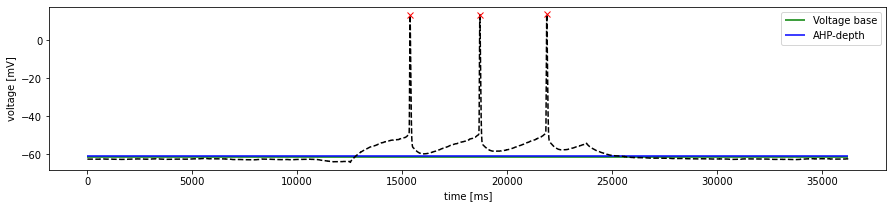


Analyzing file Homework_week5/group5/exp_APWaveform_ch6_50.dat

- Voltage base = -62.04940515854888 mV, spike count = 4
- firing frequency = 5.517545795630103 Hz, AHP depth = -61.210672757790306 mV


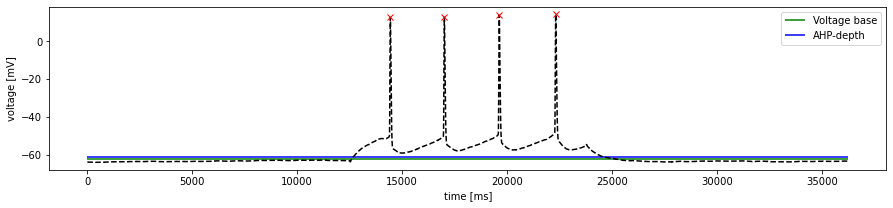


Analyzing file Homework_week5/group5/exp_APWaveform_ch6_51.dat

- Voltage base = -62.36743976925374 mV, spike count = 6
- firing frequency = 8.276318693445155 Hz, AHP depth = -61.669725327997824 mV


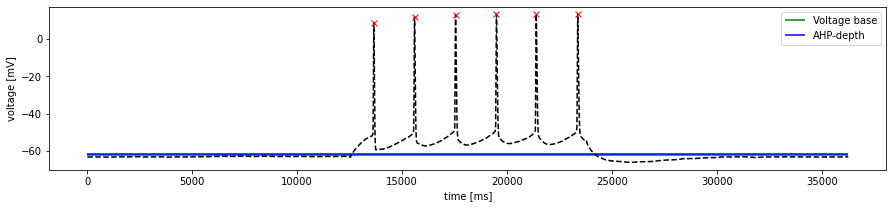


Analyzing file Homework_week5/group5/exp_IV_ch6_2031.dat

- Voltage base = -57.96866865724842 mV, spike count = 3
- firing frequency = 0.857167347638504 Hz, AHP depth = -58.3221716321033 mV


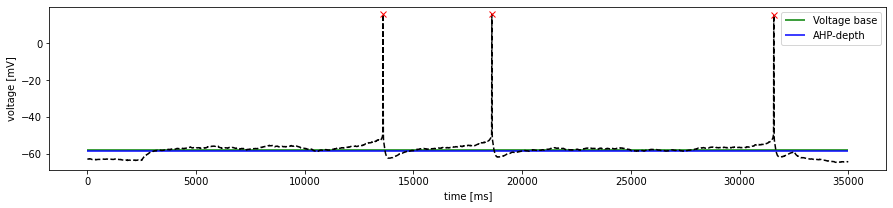


Analyzing file Homework_week5/group5/exp_IV_ch6_2032.dat

- No AP triggered
- Voltage base = AHP depth = -64.45625305175781 mV


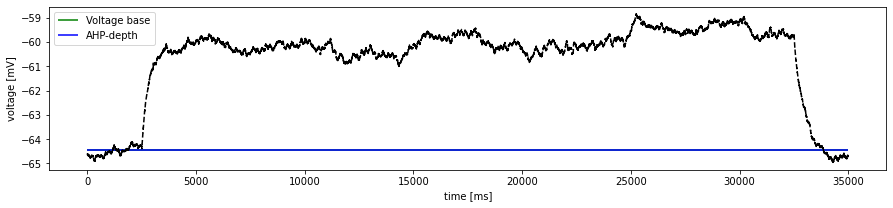


Analyzing file Homework_week5/group5/exp_IV_ch6_2033.dat

- No AP triggered
- Voltage base = AHP depth = -64.34375 mV


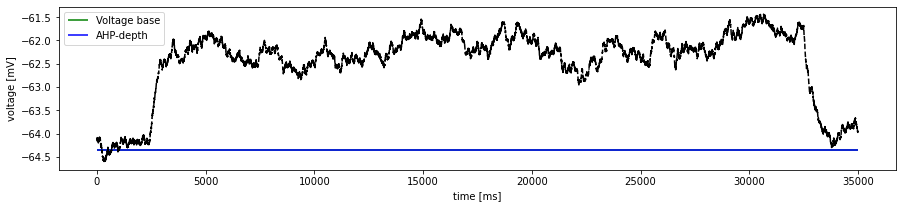


Analyzing file Homework_week5/group5/exp_IV_ch6_2034.dat

- No AP triggered
- Voltage base = AHP depth = -63.70000076293945 mV


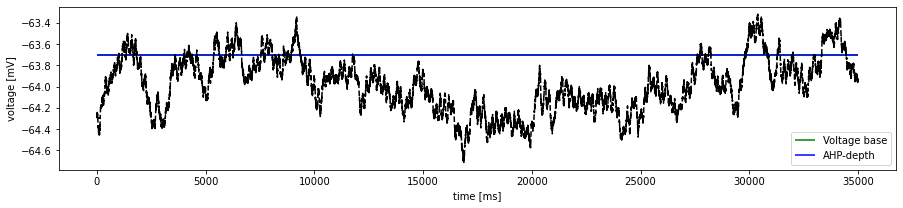


Analyzing file Homework_week5/group5/exp_IV_ch6_2035.dat

- No AP triggered
- Voltage base = AHP depth = -63.131248474121094 mV


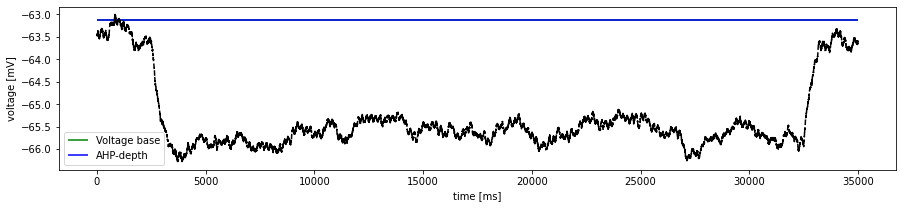


Analyzing file Homework_week5/group5/exp_IV_ch6_2036.dat

- No AP triggered
- Voltage base = AHP depth = -63.0 mV


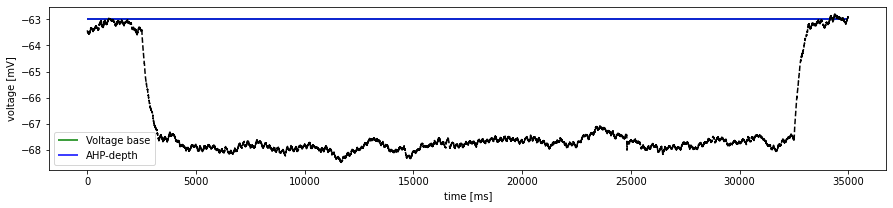


Analyzing file Homework_week5/group5/exp_IV_ch6_2037.dat

- No AP triggered
- Voltage base = AHP depth = -63.19999694824219 mV


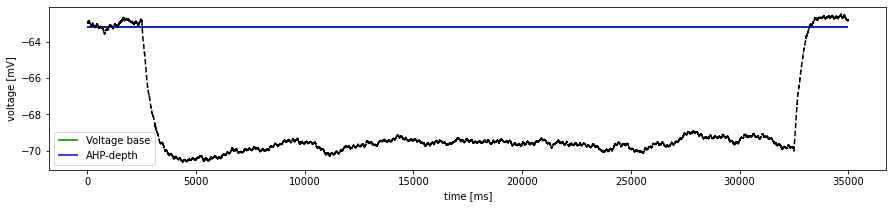


Analyzing file Homework_week5/group5/exp_IV_ch6_2038.dat

- No AP triggered
- Voltage base = AHP depth = -62.493751525878906 mV


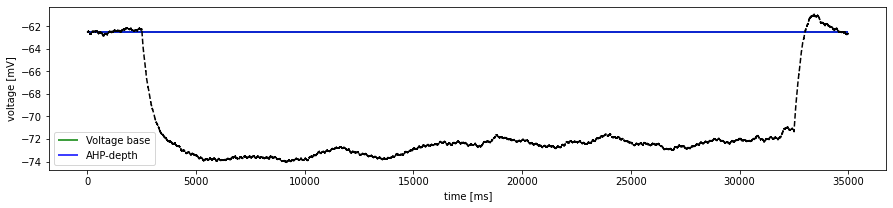


Analyzing file Homework_week5/group5/exp_IV_ch6_2039.dat

- Voltage base = -61.67499923706055 mV, spike count = 1
- firing frequency = 0.28572244921283463 Hz, AHP depth = -74.57184661106778 mV


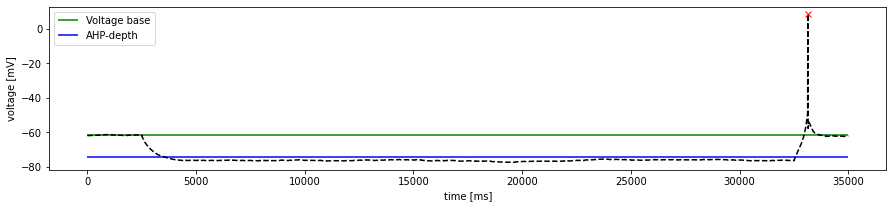


Analyzing file Homework_week5/group5/exp_IV_ch6_2040.dat

- Voltage base = -61.712501525878906 mV, spike count = 2
- firing frequency = 0.5714448984256693 Hz, AHP depth = -77.99593690391379 mV


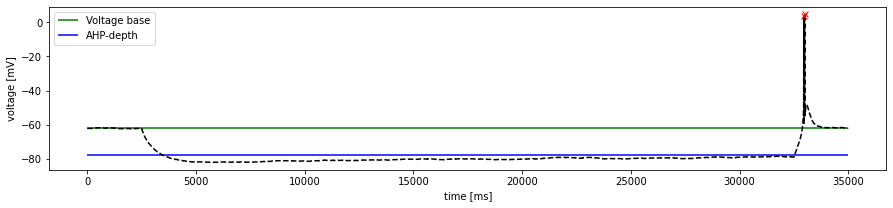


Analyzing file Homework_week5/group5/exp_IV_ch6_2041.dat

- Voltage base = -61.931251525878906 mV, spike count = 3
- firing frequency = 0.857167347638504 Hz, AHP depth = -80.72145245388378 mV


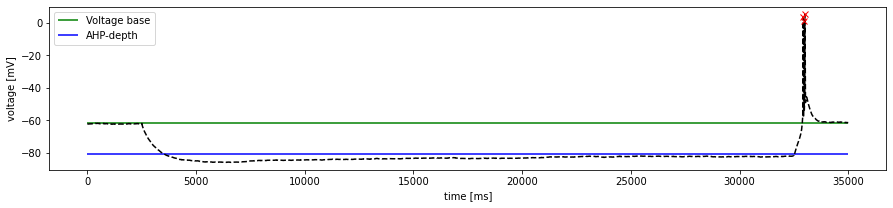


Analyzing file Homework_week5/group5/exp_FirePattern_ch6_1048.dat

- Voltage base = -61.19502550270106 mV, spike count = 34
- firing frequency = 8.29308746768135 Hz, AHP depth = -58.48603113259114 mV


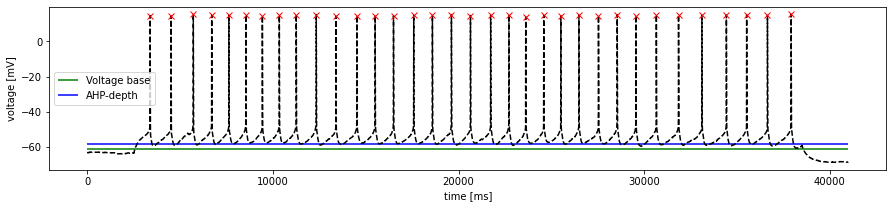


Analyzing file Homework_week5/group5/exp_FirePattern_ch6_1049.dat

- Voltage base = -62.700747462075014 mV, spike count = 68
- firing frequency = 16.5861749353627 Hz, AHP depth = -59.51760391441715 mV


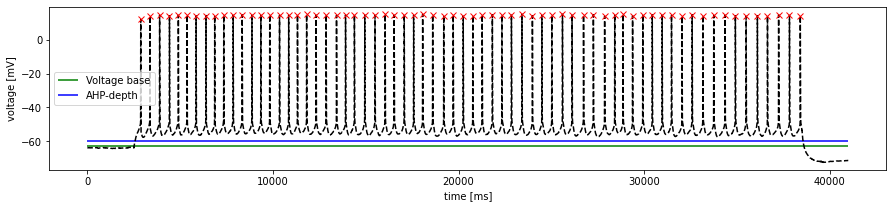

In [175]:
FILES_ = [name for list_names in FILES for name in list_names]
results = analyze_experiments(FILES_, plot = True)

# <font color= 'red'>Ex2:</font> Combine Ex 1 and Ex 2

<font size='3'> Now let's do some electrophysiological analysis on both cells from your group folder that you have used in exercise 1. Examine your plots for the two protocols you have defined and select 2 or 3 eFeatures to help you identify differences between your two cells. Would you be able to classify the cells based on these eFeatures ? Explain your choice of features and your observations. <font color= 'red'>[2.5 pts]    
 

# <font color= 'red'>Ex3:</font> Genetic Algorith (Optimisation)

<font size='3'>Change the GA code in such a way that instead of the Spikecount feature, we search for a solution with AP amplitude of 96 for stim_amp = 0.5 nA and AP amplitdue of 85 for stim_amp = 0.05 nA.
    
<font size='3'>As you can see the optimisation algoithm explained in the tutorial is very simple and gives a lot of possible solutions. Explain and demonstrate how can you modify the GA optimisation to better contrain the returned solution. <font color= 'red'>[2 pts]
    